# CHANGE KERAS AND TENSORFLOW VERSION

In [ ]:
!pip install keras==2.15.0
!pip install tensorflow==2.15.0

#LOAD DATASET

In [ ]:
!pip install keras-vis
!pip install pydot

In [ ]:
import numpy as np
from PIL import Image
import os

# Function to generate a single 32x32 RGB image with the letter "T" and a random horizontal line
def generate_image(horizontal_line_position):
    # Initialize a 32x32 image with white background
    image = np.ones((32, 32, 3), dtype=np.uint8) * 255

    # Define the color for the "T" shape (black)
    color = np.zeros((3,), dtype=np.uint8)  # Black color

    # Draw the vertical line of "T"
    image[:, 12:14] = color  # Vertical line of "T" (2 pixels wide)

    # Draw the horizontal line of "T" at the given position with increased thickness
    if horizontal_line_position >= 0:
        image[horizontal_line_position:horizontal_line_position + 2, 6:26] = color  # Thicker horizontal line of "T" (20 pixels wide, 2 pixels thick)

    return image

# Function to create a dataset
def create_dataset(num_images, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for i in range(num_images):
        # Randomly choose the horizontal line position within image bounds
        horizontal_line_position = np.random.randint(0, 32)  # Random position from 0 to 31
        image = generate_image(horizontal_line_position)
        img = Image.fromarray(image, 'RGB')
        img.save(os.path.join(save_dir, f'image_{i}.png'))

# Number of images to generate
num_images = 1000  # Adjust as needed
save_dir = 'T_dataset'

# Generate and save the dataset
create_dataset(num_images, save_dir)

print(f'Dataset generated and saved in {save_dir}')



Dataset generated and saved in T_dataset


In [ ]:
#load the images into memory
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split

def load_dataset(dataset_dir, img_size=(32, 32)):
    images = []
    labels = []

    for filename in os.listdir(dataset_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(dataset_dir, filename)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(img_size)
            img_array = np.array(img, dtype=np.float32) / 255.0  # Normalize to [0, 1]

            images.append(img_array)

            label = 1
            labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load dataset
dataset_dir = 'T_dataset'
images, labels = load_dataset(dataset_dir)

trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training images shape: {trainX.shape}")
print(f"Testing images shape: {testX.shape}")
print(f"Training labels shape: {trainY.shape}")
print(f"Testing labels shape: {testY.shape}")



Original min pixel value: 0.0
Original max pixel value: 1.0
Original mean pixel value: 0.9030644
Original std deviation: 0.29586962
Training images shape: (800, 32, 32, 3)
Testing images shape: (200, 32, 32, 3)
Training labels shape: (800,)
Testing labels shape: (200,)


In [ ]:
!pip install keras-vis
!pip install pydot

In [ ]:
from matplotlib import pyplot as plt

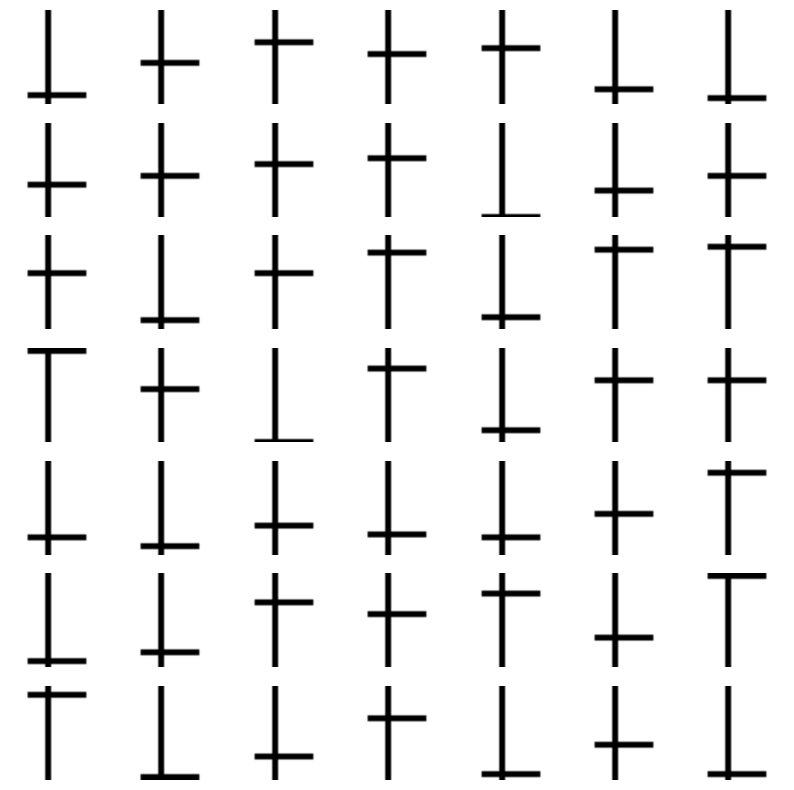

In [ ]:
num_images = 49
plt.figure(figsize=(10, 10))

for i in range(min(num_images, len(trainX))):
    plt.subplot(7,7,1+i)
    plt.axis('off')
    plt.imshow(trainX[i])

plt.show()

In [ ]:
#DEFINING DISCRIMINATOR MODEL

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np

In [ ]:
def define_discriminator(in_shape=(32, 32, 3)):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_58 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 4, 256)       

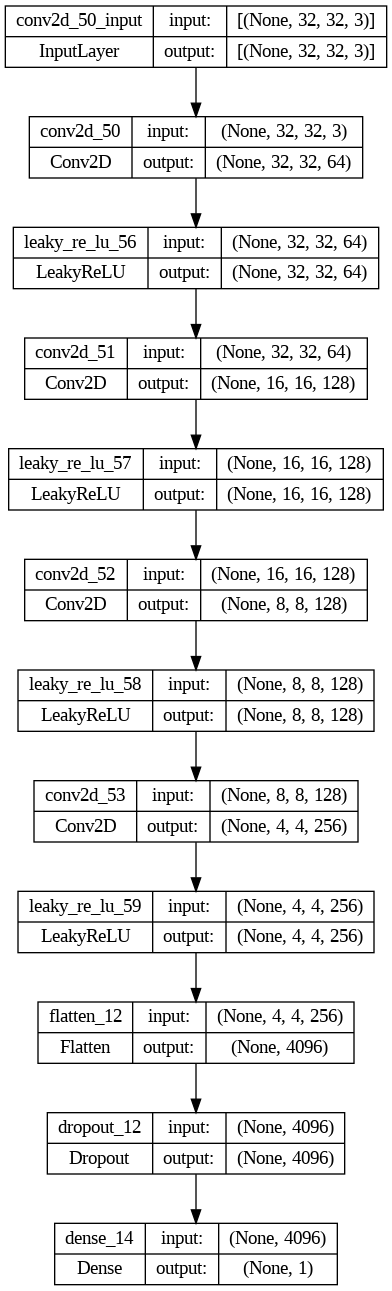

In [ ]:
model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
def load_real_samples():
    trainX, _ = load_dataset(dataset_dir='T_dataset')
    X = trainX.astype('float32')
    X = (X - 0.5) / 0.5
    return X


In [ ]:
x_shape = load_real_samples()
x_shape.shape
x_shape[0]
print("Original min pixel value:", np.min(x_shape[0]))
print("Original max pixel value:", np.max(x_shape[0]))
print("Original mean pixel value:", np.mean(x_shape[0]))
print("Original std deviation:", np.std(x_shape[0]))

Original min pixel value: 0.0
Original max pixel value: 1.0
Original mean pixel value: 0.9030644
Original std deviation: 0.29586962
Original min pixel value: -1.0
Original max pixel value: 1.0
Original mean pixel value: 0.8046875
Original std deviation: 0.5936986


In [ ]:
def generate_real_samples(dataset, n_samples):
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  X = dataset[ix]
  y = np.ones((n_samples, 1))
  return X, y

Original min pixel value: 0.0
Original max pixel value: 1.0
Original mean pixel value: 0.9030644
Original std deviation: 0.29586962


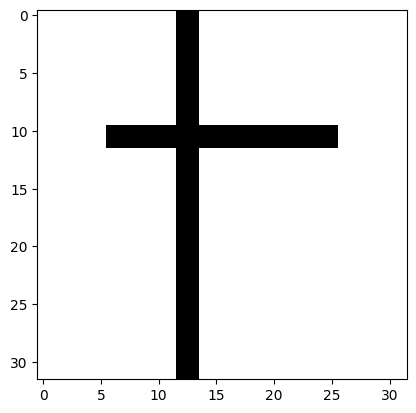

In [ ]:
dataset = load_real_samples()

X_real,y_real = generate_real_samples(dataset, 64)
plt.imshow(X_real[0])


In [ ]:
#generate fake samples with class labels
def generate_fake_samples(n_samples):
  X = np.random.rand(32*32*3*n_samples)
  X = -1 + X * 2
  X = X.reshape((n_samples, 32, 32, 3))
  y = np.zeros((n_samples, 1))
  return X,y

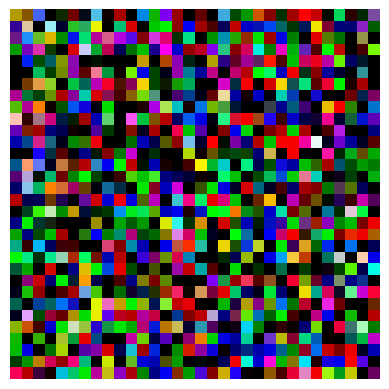

In [ ]:
X_fake,y_fake = generate_fake_samples(64)
plt.axis('off')
plt.imshow(X_fake[0])

In [ ]:
def train_discriminator(model, dataset, n_epochs=4, n_batch=128):
  half_batch = int(n_batch / 2)
  for i in range(n_epochs):
    X_real1,y_real1 = generate_real_samples(dataset, half_batch)
    _, real_acc = model.train_on_batch(X_real1, y_real1)
    X_fake1, y_fake1 = generate_fake_samples(half_batch)
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1,real_acc*100,fake_acc*100))


In [ ]:
model = define_discriminator()
dataset = load_real_samples()
train_discriminator(model, dataset)

Original min pixel value: 0.0
Original max pixel value: 1.0
Original mean pixel value: 0.9030644
Original std deviation: 0.29586962
>1 real=62% fake=8%
>2 real=100% fake=31%
>3 real=100% fake=64%
>4 real=100% fake=98%


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model


In [ ]:
def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 256 * 4 * 4
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 256)))

    # Unsample to 8x8
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Unsample to 16x16
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Unsample to 32x32
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Output layer
    model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))

    return model


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_64 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_2 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 8, 8, 128)         524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_65 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_7 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                          

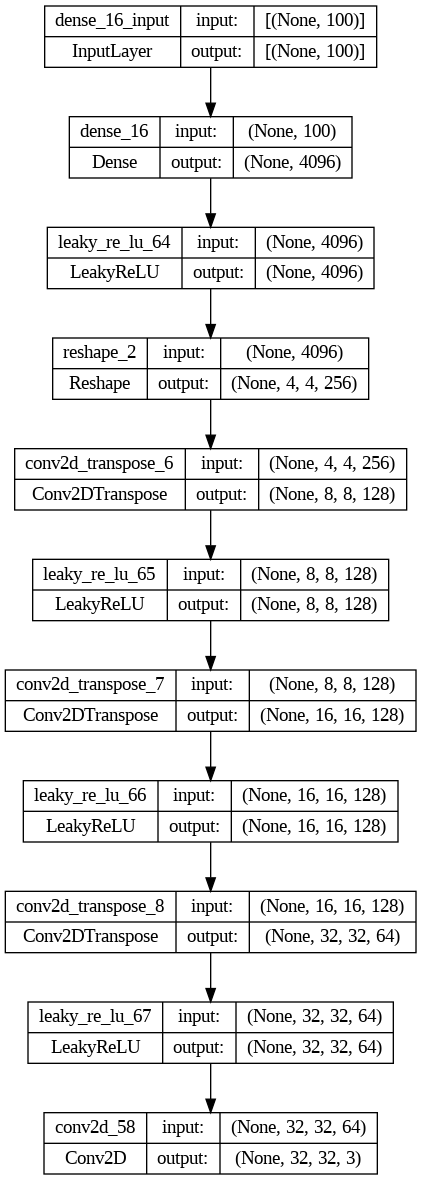

In [ ]:
latent_dim = 100
model = define_generator(latent_dim)
model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names =True)

In [ ]:
#generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [ ]:
x_input = generate_latent_points(100, 64)
print(x_input.shape)

(64, 100)


In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples):
  x_input = generate_latent_points(latent_dim, n_samples)
  X = g_model.predict(x_input)
  y = np.zeros((n_samples, 1))
  return X, y

2/2 [==============================] - 0s 9ms/step


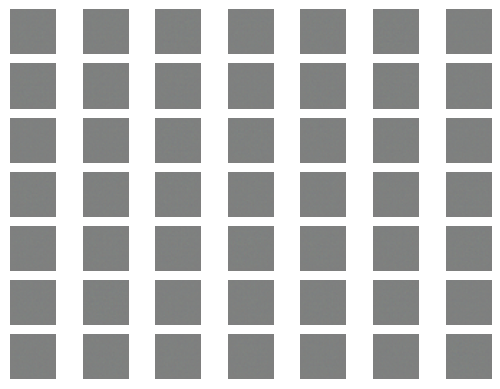

In [ ]:
latent_dim = 100
model = define_generator(latent_dim)
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
X = (X+1) / 2.0
for i in range(n_samples):
  plt.subplot(7, 7 , 1+i)
  plt.axis('off')
  plt.imshow(X[i])
plt.show()

In [ ]:
def define_gan(g_model, d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  opt = Adam(learning_rate=0.0002, beta_1 = 0.5)
  model.compile(loss='binary_crossentropy', optimizer = opt)
  return model

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_19 (Sequential)  (None, 32, 32, 3)         1333251   
                                                                 
 sequential_18 (Sequential)  (None, 1)                 522497    
                                                                 
Total params: 1855748 (7.08 MB)
Trainable params: 1333251 (5.09 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


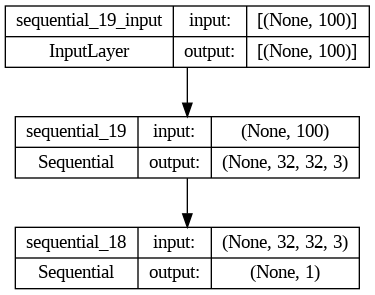

In [ ]:
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
gan_model.summary()
plot_model(gan_model,to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    batch_per_epoch = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # Manually enumerate epochs
    for i in range(n_epochs):
        # Enumerate batches over the training set
        for j in range(batch_per_epoch):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            d_loss1 = d_loss1 if not isinstance(d_loss1, list) else d_loss1[0]
            d_loss2 = d_loss2 if not isinstance(d_loss2, list) else d_loss2[0]
            g_loss = g_loss if not isinstance(g_loss, list) else g_loss[0]
            # Summarize loss on this batch
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, batch_per_epoch, d_loss1, d_loss2, g_loss))
            summarize_performance(i, g_model, d_model, dataset, latent_dim)



In [ ]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    X_real, y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose=0)
    print(f'>Accuracy real: {acc_real*100:.2f}%, fake: {acc_fake*100:.2f}%')
    save_plot(X_fake, epoch)
    filename = f'generator_model_{epoch+1:03d}.h5'
    g_model.save(filename)


In [ ]:
def save_plot(examples, epoch, n=7):
  #scale form [-1,1] to [0,1]
  examples = (examples + 1) / 2.0
  for i in range(n * n):
    plt.subplot(n, n, 1+i)
    plt.axis('off')
    plt.imshow(examples[i])
  filename = 'generated_plot_e%03d.png' % (epoch+1)
  plt.savefig(filename)
  plt.close()

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128)

2/2 [==============================] - 0s 8ms/step
>1, 1/7, d1=0.644, d2=0.696 g=0.691
5/5 [==============================] - 0s 49ms/step
>Accuracy real: 100.00%, fake: 0.00%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step
>1, 2/7, d1=0.441, d2=0.698 g=0.689
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 5ms/step
>1, 3/7, d1=0.291, d2=0.704 g=0.684
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 5ms/step
>1, 4/7, d1=0.151, d2=0.717 g=0.671
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 5ms/step
>1, 5/7, d1=0.071, d2=0.743 g=0.651
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 5ms/step
>1, 6/7, d1=0.031, d2=0.783 g=0.625
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 4ms/step
>1, 7/7, d1=0.026, d2=0.833 g=0.602
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 5ms/step
>2, 1/7, d1=0.030, d2=0.873 g=0.601
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 8ms/step
>2, 2/7, d1=0.047, d2=0.864 g=0.632
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 6ms/step
>2, 3/7, d1=0.078, d2=0.807 g=0.707
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 4ms/step
>2, 4/7, d1=0.112, d2=0.721 g=0.819
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>2, 5/7, d1=0.115, d2=0.629 g=0.910
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>2, 6/7, d1=0.086, d2=0.558 g=1.001
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>2, 7/7, d1=0.055, d2=0.526 g=1.015
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>3, 1/7, d1=0.037, d2=0.546 g=0.948
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>3, 2/7, d1=0.021, d2=0.574 g=0.879
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>3, 3/7, d1=0.016, d2=0.603 g=0.826
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>3, 4/7, d1=0.011, d2=0.621 g=0.796
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>3, 5/7, d1=0.008, d2=0.628 g=0.782
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>3, 6/7, d1=0.007, d2=0.628 g=0.783
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>3, 7/7, d1=0.006, d2=0.622 g=0.789
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>4, 1/7, d1=0.004, d2=0.613 g=0.805
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>4, 2/7, d1=0.004, d2=0.598 g=0.828
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>4, 3/7, d1=0.003, d2=0.576 g=0.864
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>4, 4/7, d1=0.003, d2=0.545 g=0.927
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>4, 5/7, d1=0.004, d2=0.502 g=1.011
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>4, 6/7, d1=0.003, d2=0.448 g=1.126
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>4, 7/7, d1=0.004, d2=0.387 g=1.278
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>5, 1/7, d1=0.004, d2=0.319 g=1.499
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>5, 2/7, d1=0.006, d2=0.246 g=1.776
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>5, 3/7, d1=0.005, d2=0.180 g=2.094
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>5, 4/7, d1=0.005, d2=0.126 g=2.490
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>5, 5/7, d1=0.005, d2=0.087 g=2.863
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>5, 6/7, d1=0.003, d2=0.059 g=3.224
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>5, 7/7, d1=0.004, d2=0.045 g=3.516
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>6, 1/7, d1=0.001, d2=0.031 g=3.887
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>6, 2/7, d1=0.003, d2=0.025 g=4.021
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>6, 3/7, d1=0.001, d2=0.019 g=4.305
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>6, 4/7, d1=0.002, d2=0.016 g=4.389
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>6, 5/7, d1=0.001, d2=0.015 g=4.620
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>6, 6/7, d1=0.004, d2=0.024 g=4.283
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>6, 7/7, d1=0.000, d2=0.031 g=6.349
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 0.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>7, 1/7, d1=2.316, d2=1.964 g=0.077
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 8ms/step
>7, 2/7, d1=0.000, d2=3.501 g=0.095
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 9ms/step
>7, 3/7, d1=0.000, d2=3.104 g=0.143
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 6ms/step
>7, 4/7, d1=0.000, d2=2.583 g=0.200
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 10ms/step
>7, 5/7, d1=0.000, d2=2.107 g=0.328
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 0.00%


2/2 [==============================] - 0s 4ms/step
>7, 6/7, d1=0.000, d2=1.374 g=0.605
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 1.33%


2/2 [==============================] - 0s 4ms/step
>7, 7/7, d1=0.010, d2=0.716 g=1.044
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>8, 1/7, d1=0.105, d2=0.441 g=1.455
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>8, 2/7, d1=0.277, d2=0.510 g=1.168
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 90.67%


2/2 [==============================] - 0s 8ms/step
>8, 3/7, d1=0.168, d2=0.626 g=1.094
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 73.33%


2/2 [==============================] - 0s 5ms/step
>8, 4/7, d1=0.220, d2=0.790 g=1.050
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 43.33%


2/2 [==============================] - 0s 7ms/step
>8, 5/7, d1=0.320, d2=1.048 g=0.796
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 12.00%


2/2 [==============================] - 0s 4ms/step
>8, 6/7, d1=0.312, d2=1.161 g=0.628
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 5.33%


2/2 [==============================] - 0s 5ms/step
>8, 7/7, d1=0.332, d2=1.238 g=0.594
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 2.67%


2/2 [==============================] - 0s 5ms/step
>9, 1/7, d1=0.379, d2=1.317 g=0.493
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 2.00%


2/2 [==============================] - 0s 4ms/step
>9, 2/7, d1=0.335, d2=1.283 g=0.525
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 0.67%


2/2 [==============================] - 0s 6ms/step
>9, 3/7, d1=0.354, d2=1.205 g=0.540
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 2.00%


2/2 [==============================] - 0s 6ms/step
>9, 4/7, d1=0.320, d2=1.127 g=0.617
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 1.33%


2/2 [==============================] - 0s 6ms/step
>9, 5/7, d1=0.368, d2=1.107 g=0.678
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 2.67%


2/2 [==============================] - 0s 6ms/step
>9, 6/7, d1=0.341, d2=0.984 g=0.769
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 2.00%


2/2 [==============================] - 0s 9ms/step
>9, 7/7, d1=0.366, d2=0.941 g=0.802
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 10.67%


2/2 [==============================] - 0s 5ms/step
>10, 1/7, d1=0.413, d2=0.936 g=0.812
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 2.00%


2/2 [==============================] - 0s 5ms/step
>10, 2/7, d1=0.395, d2=0.961 g=0.798
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 5.33%


2/2 [==============================] - 0s 6ms/step
>10, 3/7, d1=0.476, d2=0.982 g=0.743
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 30.67%


2/2 [==============================] - 0s 6ms/step
>10, 4/7, d1=0.471, d2=0.909 g=0.750
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 55.33%


2/2 [==============================] - 0s 7ms/step
>10, 5/7, d1=0.427, d2=0.867 g=0.827
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 60.67%


2/2 [==============================] - 0s 6ms/step
>10, 6/7, d1=0.373, d2=0.817 g=0.922
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 98.67%


2/2 [==============================] - 0s 5ms/step
>10, 7/7, d1=0.451, d2=0.826 g=0.956
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>11, 1/7, d1=0.531, d2=0.783 g=0.967
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>11, 2/7, d1=0.470, d2=0.776 g=0.955
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>11, 3/7, d1=0.492, d2=0.807 g=0.903
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>11, 4/7, d1=0.488, d2=0.821 g=0.907
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>11, 5/7, d1=0.505, d2=0.768 g=0.896
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>11, 6/7, d1=0.557, d2=0.840 g=0.851
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 99.33%


2/2 [==============================] - 0s 9ms/step
>11, 7/7, d1=0.478, d2=0.760 g=0.881
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>12, 1/7, d1=0.481, d2=0.728 g=0.896
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>12, 2/7, d1=0.441, d2=0.718 g=0.976
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>12, 3/7, d1=0.450, d2=0.682 g=1.036
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>12, 4/7, d1=0.494, d2=0.694 g=1.012
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>12, 5/7, d1=0.467, d2=0.736 g=1.051
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 99.33%


2/2 [==============================] - 0s 6ms/step
>12, 6/7, d1=0.499, d2=0.682 g=1.089
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 81.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>12, 7/7, d1=0.561, d2=0.748 g=1.050
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 83.33%, fake: 99.33%


2/2 [==============================] - 0s 5ms/step
>13, 1/7, d1=0.575, d2=0.765 g=1.015
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 79.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>13, 2/7, d1=0.630, d2=0.778 g=1.036
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 82.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>13, 3/7, d1=0.631, d2=0.768 g=1.020
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 84.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>13, 4/7, d1=0.639, d2=0.718 g=1.013
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 84.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>13, 5/7, d1=0.660, d2=0.745 g=0.953
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 82.67%, fake: 98.00%


2/2 [==============================] - 0s 5ms/step
>13, 6/7, d1=0.625, d2=0.764 g=1.021
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 77.33%, fake: 99.33%


2/2 [==============================] - 0s 6ms/step
>13, 7/7, d1=0.728, d2=0.754 g=0.989
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 80.67%, fake: 98.67%


2/2 [==============================] - 0s 5ms/step
>14, 1/7, d1=0.660, d2=0.735 g=1.022
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 84.00%, fake: 98.67%


2/2 [==============================] - 0s 5ms/step
>14, 2/7, d1=0.677, d2=0.753 g=1.020
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 71.33%, fake: 100.00%


2/2 [==============================] - 0s 10ms/step
>14, 3/7, d1=0.716, d2=0.705 g=1.001
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 79.33%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>14, 4/7, d1=0.703, d2=0.712 g=0.953
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 84.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>14, 5/7, d1=0.641, d2=0.728 g=1.002
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 78.67%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>14, 6/7, d1=0.696, d2=0.701 g=1.007
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 74.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>14, 7/7, d1=0.649, d2=0.694 g=1.024
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 84.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>15, 1/7, d1=0.661, d2=0.662 g=1.030
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 82.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>15, 2/7, d1=0.647, d2=0.644 g=1.044
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 80.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>15, 3/7, d1=0.678, d2=0.651 g=1.009
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 84.00%, fake: 100.00%


2/2 [==============================] - 0s 11ms/step
>15, 4/7, d1=0.618, d2=0.666 g=1.038
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 78.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>15, 5/7, d1=0.649, d2=0.670 g=1.057
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 76.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>15, 6/7, d1=0.621, d2=0.595 g=1.105
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 85.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>15, 7/7, d1=0.596, d2=0.629 g=1.142
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 84.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>16, 1/7, d1=0.592, d2=0.586 g=1.186
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 88.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>16, 2/7, d1=0.545, d2=0.553 g=1.154
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 88.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>16, 3/7, d1=0.617, d2=0.578 g=1.142
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 80.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>16, 4/7, d1=0.520, d2=0.553 g=1.209
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 88.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>16, 5/7, d1=0.581, d2=0.540 g=1.181
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 83.33%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>16, 6/7, d1=0.507, d2=0.521 g=1.267
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 82.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>16, 7/7, d1=0.531, d2=0.512 g=1.275
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 81.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>17, 1/7, d1=0.524, d2=0.485 g=1.285
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 84.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>17, 2/7, d1=0.543, d2=0.519 g=1.288
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 86.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>17, 3/7, d1=0.528, d2=0.470 g=1.292
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 85.33%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>17, 4/7, d1=0.442, d2=0.470 g=1.350
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 90.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>17, 5/7, d1=0.456, d2=0.418 g=1.452
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 88.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>17, 6/7, d1=0.476, d2=0.412 g=1.397
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 84.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>17, 7/7, d1=0.440, d2=0.416 g=1.448
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 86.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>18, 1/7, d1=0.422, d2=0.353 g=1.463
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 85.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>18, 2/7, d1=0.390, d2=0.442 g=1.498
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 90.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>18, 3/7, d1=0.432, d2=0.380 g=1.533
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 82.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>18, 4/7, d1=0.462, d2=0.423 g=1.463
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 90.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>18, 5/7, d1=0.380, d2=0.462 g=1.585
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 80.00%, fake: 96.00%


2/2 [==============================] - 0s 5ms/step
>18, 6/7, d1=0.467, d2=0.845 g=1.611
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 58.00%, fake: 0.00%


2/2 [==============================] - 0s 6ms/step
>18, 7/7, d1=0.724, d2=2.986 g=1.570
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 0.00%, fake: 0.00%


2/2 [==============================] - 0s 6ms/step
>19, 1/7, d1=1.338, d2=0.810 g=4.845
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 20.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>19, 2/7, d1=0.954, d2=0.017 g=4.609
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>19, 3/7, d1=0.447, d2=0.096 g=2.676
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>19, 4/7, d1=0.252, d2=0.500 g=1.532
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 61.33%


2/2 [==============================] - 0s 7ms/step
>19, 5/7, d1=0.260, d2=0.705 g=1.184
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 97.33%, fake: 99.33%


2/2 [==============================] - 0s 6ms/step
>19, 6/7, d1=0.355, d2=0.611 g=1.113
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 92.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>19, 7/7, d1=0.492, d2=0.545 g=1.171
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>20, 1/7, d1=0.436, d2=0.461 g=1.296
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>20, 2/7, d1=0.382, d2=0.414 g=1.435
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>20, 3/7, d1=0.347, d2=0.405 g=1.416
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>20, 4/7, d1=0.370, d2=0.453 g=1.399
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 93.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>20, 5/7, d1=0.339, d2=0.428 g=1.435
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>20, 6/7, d1=0.393, d2=0.400 g=1.446
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>20, 7/7, d1=0.413, d2=0.405 g=1.493
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>21, 1/7, d1=0.422, d2=0.371 g=1.545
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>21, 2/7, d1=0.423, d2=0.387 g=1.544
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>21, 3/7, d1=0.404, d2=0.362 g=1.587
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>21, 4/7, d1=0.352, d2=0.313 g=1.660
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>21, 5/7, d1=0.365, d2=0.298 g=1.727
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 90.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>21, 6/7, d1=0.252, d2=0.261 g=1.900
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 88.67%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>21, 7/7, d1=0.286, d2=0.248 g=1.904
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 93.33%, fake: 100.00%


2/2 [==============================] - 0s 10ms/step
>22, 1/7, d1=0.383, d2=0.277 g=1.813
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>22, 2/7, d1=0.233, d2=0.220 g=1.989
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>22, 3/7, d1=0.251, d2=0.213 g=1.992
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 93.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>22, 4/7, d1=0.273, d2=0.193 g=2.029
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>22, 5/7, d1=0.280, d2=0.215 g=1.997
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 91.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>22, 6/7, d1=0.291, d2=0.225 g=1.948
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 91.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>22, 7/7, d1=0.228, d2=0.221 g=2.050
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 90.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>23, 1/7, d1=0.243, d2=0.254 g=2.101
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>23, 2/7, d1=0.424, d2=0.579 g=2.302
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 88.00%, fake: 100.00%


2/2 [==============================] - 0s 10ms/step
>23, 3/7, d1=0.493, d2=0.503 g=2.583
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 76.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>23, 4/7, d1=0.774, d2=0.335 g=2.604
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.67%, fake: 99.33%


2/2 [==============================] - 0s 6ms/step
>23, 5/7, d1=0.310, d2=0.253 g=3.312
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.67%, fake: 56.00%


2/2 [==============================] - 0s 5ms/step
>23, 6/7, d1=0.521, d2=0.910 g=5.577
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 89.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>23, 7/7, d1=0.402, d2=0.009 g=6.953
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 90.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>24, 1/7, d1=0.395, d2=0.017 g=4.937
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 96.67%


2/2 [==============================] - 0s 5ms/step
>24, 2/7, d1=0.110, d2=0.391 g=6.941
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>24, 3/7, d1=0.194, d2=0.004 g=6.702
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>24, 4/7, d1=0.167, d2=0.136 g=3.547
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 13.33%


2/2 [==============================] - 0s 4ms/step
>24, 5/7, d1=0.132, d2=1.475 g=3.681
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 26.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>24, 6/7, d1=1.066, d2=0.682 g=1.600
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 61.33%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>24, 7/7, d1=0.582, d2=0.595 g=1.307
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>25, 1/7, d1=0.254, d2=0.403 g=1.672
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 82.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>25, 2/7, d1=0.345, d2=0.307 g=1.745
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>25, 3/7, d1=0.252, d2=0.304 g=1.901
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 90.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>25, 4/7, d1=0.224, d2=0.275 g=1.989
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 90.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>25, 5/7, d1=0.179, d2=0.240 g=2.100
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 92.67%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>25, 6/7, d1=0.257, d2=0.336 g=2.004
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 85.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>25, 7/7, d1=0.309, d2=0.430 g=1.993
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 79.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>26, 1/7, d1=0.423, d2=0.384 g=1.876
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 87.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>26, 2/7, d1=0.311, d2=0.330 g=1.793
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 76.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>26, 3/7, d1=0.448, d2=0.412 g=1.655
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 86.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>26, 4/7, d1=0.366, d2=0.357 g=1.856
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 88.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>26, 5/7, d1=0.337, d2=0.347 g=1.904
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 91.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>26, 6/7, d1=0.365, d2=0.339 g=1.854
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 83.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>26, 7/7, d1=0.395, d2=0.332 g=1.836
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 77.33%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>27, 1/7, d1=0.332, d2=0.284 g=1.885
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 81.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>27, 2/7, d1=0.287, d2=0.250 g=2.028
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 80.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>27, 3/7, d1=0.400, d2=0.249 g=1.823
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 83.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>27, 4/7, d1=0.353, d2=0.302 g=1.920
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 88.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>27, 5/7, d1=0.315, d2=0.235 g=2.004
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 84.67%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>27, 6/7, d1=0.234, d2=0.194 g=2.115
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 81.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>27, 7/7, d1=0.219, d2=0.173 g=2.246
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 81.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>28, 1/7, d1=0.289, d2=0.171 g=2.152
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 88.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>28, 2/7, d1=0.176, d2=0.169 g=2.260
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 91.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>28, 3/7, d1=0.227, d2=0.168 g=2.327
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>28, 4/7, d1=0.166, d2=0.136 g=2.423
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>28, 5/7, d1=0.227, d2=0.152 g=2.355
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 93.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>28, 6/7, d1=0.231, d2=0.142 g=2.360
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>28, 7/7, d1=0.118, d2=0.112 g=2.476
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>29, 1/7, d1=0.193, d2=0.118 g=2.423
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>29, 2/7, d1=0.127, d2=0.109 g=2.576
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>29, 3/7, d1=0.196, d2=0.113 g=2.462
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>29, 4/7, d1=0.087, d2=0.110 g=2.622
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>29, 5/7, d1=0.081, d2=0.093 g=2.767
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>29, 6/7, d1=0.163, d2=0.089 g=2.769
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>29, 7/7, d1=0.133, d2=0.091 g=2.822
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>30, 1/7, d1=0.149, d2=0.086 g=2.825
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>30, 2/7, d1=0.132, d2=0.088 g=2.741
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>30, 3/7, d1=0.133, d2=0.086 g=2.805
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 93.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>30, 4/7, d1=0.096, d2=0.075 g=2.861
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>30, 5/7, d1=0.121, d2=0.081 g=2.868
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>30, 6/7, d1=0.113, d2=0.077 g=2.897
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>30, 7/7, d1=0.052, d2=0.070 g=3.116
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>31, 1/7, d1=0.052, d2=0.051 g=3.216
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 93.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>31, 2/7, d1=0.108, d2=0.055 g=3.124
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>31, 3/7, d1=0.131, d2=0.065 g=3.035
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 93.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>31, 4/7, d1=0.065, d2=0.061 g=3.129
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>31, 5/7, d1=0.138, d2=0.059 g=3.019
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>31, 6/7, d1=0.088, d2=0.063 g=3.092
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 98.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>31, 7/7, d1=0.104, d2=0.064 g=3.116
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>32, 1/7, d1=0.056, d2=0.054 g=3.266
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>32, 2/7, d1=0.080, d2=0.052 g=3.196
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>32, 3/7, d1=0.076, d2=0.048 g=3.201
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>32, 4/7, d1=0.142, d2=0.062 g=3.093
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>32, 5/7, d1=0.063, d2=0.049 g=3.243
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>32, 6/7, d1=0.022, d2=0.045 g=3.389
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>32, 7/7, d1=0.061, d2=0.043 g=3.398
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>33, 1/7, d1=0.085, d2=0.044 g=3.363
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>33, 2/7, d1=0.045, d2=0.046 g=3.504
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>33, 3/7, d1=0.174, d2=0.052 g=3.212
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>33, 4/7, d1=0.055, d2=0.053 g=3.289
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>33, 5/7, d1=0.134, d2=0.060 g=3.114
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>33, 6/7, d1=0.054, d2=0.050 g=3.219
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>33, 7/7, d1=0.037, d2=0.047 g=3.437
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>34, 1/7, d1=0.090, d2=0.053 g=3.402
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>34, 2/7, d1=0.061, d2=0.112 g=3.425
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 3.33%


2/2 [==============================] - 0s 5ms/step
>34, 3/7, d1=0.092, d2=2.121 g=8.258
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 1.33%, fake: 84.00%


2/2 [==============================] - 0s 5ms/step
>34, 4/7, d1=3.283, d2=2.171 g=7.105
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>34, 5/7, d1=1.048, d2=0.002 g=7.871
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 77.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>34, 6/7, d1=0.745, d2=0.063 g=4.389
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 86.00%, fake: 4.67%


2/2 [==============================] - 0s 7ms/step
>34, 7/7, d1=0.169, d2=1.245 g=19.943
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 59.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>35, 1/7, d1=0.669, d2=0.000 g=19.008
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 53.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>35, 2/7, d1=1.227, d2=0.029 g=3.303
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 82.67%, fake: 6.00%


2/2 [==============================] - 0s 5ms/step
>35, 3/7, d1=0.187, d2=1.261 g=0.931
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 76.00%, fake: 2.00%


2/2 [==============================] - 0s 7ms/step
>35, 4/7, d1=0.351, d2=0.743 g=1.278
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 64.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>35, 5/7, d1=0.649, d2=0.532 g=1.338
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 72.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>35, 6/7, d1=0.617, d2=0.455 g=1.380
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 70.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>35, 7/7, d1=0.539, d2=0.408 g=1.388
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 70.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>36, 1/7, d1=0.372, d2=0.355 g=1.550
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 78.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>36, 2/7, d1=0.297, d2=0.275 g=1.767
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 91.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>36, 3/7, d1=0.330, d2=0.258 g=1.747
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>36, 4/7, d1=0.230, d2=0.231 g=1.838
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>36, 5/7, d1=0.233, d2=0.215 g=1.949
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>36, 6/7, d1=0.237, d2=0.178 g=1.976
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 92.67%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>36, 7/7, d1=0.252, d2=0.203 g=1.894
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>37, 1/7, d1=0.141, d2=0.176 g=2.114
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>37, 2/7, d1=0.204, d2=0.154 g=2.107
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>37, 3/7, d1=0.138, d2=0.157 g=2.211
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>37, 4/7, d1=0.128, d2=0.142 g=2.318
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>37, 5/7, d1=0.127, d2=0.120 g=2.440
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>37, 6/7, d1=0.111, d2=0.109 g=2.500
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>37, 7/7, d1=0.138, d2=0.107 g=2.550
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>38, 1/7, d1=0.135, d2=0.101 g=2.499
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>38, 2/7, d1=0.131, d2=0.104 g=2.500
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>38, 3/7, d1=0.108, d2=0.105 g=2.576
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>38, 4/7, d1=0.123, d2=0.094 g=2.544
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>38, 5/7, d1=0.103, d2=0.102 g=2.558
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>38, 6/7, d1=0.166, d2=0.094 g=2.513
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>38, 7/7, d1=0.081, d2=0.093 g=2.608
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 99.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>39, 1/7, d1=0.099, d2=0.088 g=2.657
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>39, 2/7, d1=0.087, d2=0.084 g=2.717
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>39, 3/7, d1=0.061, d2=0.071 g=2.879
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>39, 4/7, d1=0.076, d2=0.071 g=2.922
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>39, 5/7, d1=0.055, d2=0.064 g=2.944
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>39, 6/7, d1=0.071, d2=0.062 g=2.987
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>39, 7/7, d1=0.066, d2=0.059 g=2.995
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>40, 1/7, d1=0.077, d2=0.055 g=3.032
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>40, 2/7, d1=0.075, d2=0.057 g=3.042
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>40, 3/7, d1=0.031, d2=0.059 g=3.134
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>40, 4/7, d1=0.090, d2=0.050 g=3.116
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>40, 5/7, d1=0.039, d2=0.054 g=3.178
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>40, 6/7, d1=0.039, d2=0.048 g=3.250
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>40, 7/7, d1=0.039, d2=0.043 g=3.383
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>41, 1/7, d1=0.053, d2=0.043 g=3.350
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>41, 2/7, d1=0.072, d2=0.046 g=3.309
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>41, 3/7, d1=0.076, d2=0.046 g=3.288
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>41, 4/7, d1=0.037, d2=0.048 g=3.321
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>41, 5/7, d1=0.055, d2=0.044 g=3.267
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>41, 6/7, d1=0.077, d2=0.047 g=3.223
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>41, 7/7, d1=0.069, d2=0.058 g=3.237
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>42, 1/7, d1=0.038, d2=0.049 g=3.348
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>42, 2/7, d1=0.045, d2=0.043 g=3.393
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>42, 3/7, d1=0.024, d2=0.038 g=3.385
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>42, 4/7, d1=0.023, d2=0.035 g=3.531
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>42, 5/7, d1=0.034, d2=0.034 g=3.601
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>42, 6/7, d1=0.019, d2=0.033 g=3.637
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>42, 7/7, d1=0.023, d2=0.028 g=3.773
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>43, 1/7, d1=0.036, d2=0.027 g=3.778
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>43, 2/7, d1=0.022, d2=0.026 g=3.822
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>43, 3/7, d1=0.027, d2=0.028 g=3.862
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>43, 4/7, d1=0.022, d2=0.024 g=3.964
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>43, 5/7, d1=0.025, d2=0.024 g=3.857
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>43, 6/7, d1=0.027, d2=0.025 g=3.954
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>43, 7/7, d1=0.029, d2=0.023 g=3.956
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>44, 1/7, d1=0.041, d2=0.024 g=3.818
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 9ms/step
>44, 2/7, d1=0.025, d2=0.028 g=3.819
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>44, 3/7, d1=0.035, d2=0.026 g=3.812
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>44, 4/7, d1=0.036, d2=0.027 g=3.819
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>44, 5/7, d1=0.018, d2=0.024 g=3.918
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>44, 6/7, d1=0.029, d2=0.027 g=3.778
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>44, 7/7, d1=0.019, d2=0.022 g=3.878
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>45, 1/7, d1=0.027, d2=0.027 g=3.935
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>45, 2/7, d1=0.026, d2=0.024 g=3.951
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>45, 3/7, d1=0.027, d2=0.022 g=4.043
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>45, 4/7, d1=0.025, d2=0.022 g=3.983
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>45, 5/7, d1=0.021, d2=0.025 g=3.986
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>45, 6/7, d1=0.035, d2=0.024 g=4.015
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>45, 7/7, d1=0.027, d2=0.023 g=3.996
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>46, 1/7, d1=0.011, d2=0.022 g=3.995
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>46, 2/7, d1=0.019, d2=0.021 g=4.062
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>46, 3/7, d1=0.019, d2=0.019 g=4.041
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>46, 4/7, d1=0.014, d2=0.020 g=4.162
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>46, 5/7, d1=0.023, d2=0.018 g=4.150
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>46, 6/7, d1=0.026, d2=0.018 g=4.126
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>46, 7/7, d1=0.017, d2=0.019 g=4.170
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>47, 1/7, d1=0.017, d2=0.017 g=4.157
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>47, 2/7, d1=0.014, d2=0.017 g=4.210
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>47, 3/7, d1=0.013, d2=0.018 g=4.182
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>47, 4/7, d1=0.010, d2=0.016 g=4.327
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>47, 5/7, d1=0.016, d2=0.015 g=4.309
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>47, 6/7, d1=0.005, d2=0.016 g=4.430
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>47, 7/7, d1=0.011, d2=0.014 g=4.498
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>48, 1/7, d1=0.028, d2=0.014 g=4.358
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>48, 2/7, d1=0.016, d2=0.016 g=4.383
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>48, 3/7, d1=0.012, d2=0.014 g=4.412
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>48, 4/7, d1=0.007, d2=0.013 g=4.463
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>48, 5/7, d1=0.011, d2=0.013 g=4.518
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>48, 6/7, d1=0.018, d2=0.014 g=4.522
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>48, 7/7, d1=0.015, d2=0.013 g=4.543
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>49, 1/7, d1=0.006, d2=0.014 g=4.593
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>49, 2/7, d1=0.012, d2=0.012 g=4.590
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>49, 3/7, d1=0.019, d2=0.014 g=4.480
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>49, 4/7, d1=0.011, d2=0.013 g=4.563
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>49, 5/7, d1=0.010, d2=0.013 g=4.531
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>49, 6/7, d1=0.009, d2=0.011 g=4.589
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>49, 7/7, d1=0.006, d2=0.011 g=4.627
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>50, 1/7, d1=0.014, d2=0.011 g=4.693
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>50, 2/7, d1=0.010, d2=0.010 g=4.637
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 11ms/step
>50, 3/7, d1=0.008, d2=0.011 g=4.731
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>50, 4/7, d1=0.012, d2=0.011 g=4.776
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>50, 5/7, d1=0.004, d2=0.011 g=4.728
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>50, 6/7, d1=0.008, d2=0.010 g=4.838
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>50, 7/7, d1=0.002, d2=0.009 g=4.958
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 10ms/step
>51, 1/7, d1=0.023, d2=0.010 g=4.753
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>51, 2/7, d1=0.007, d2=0.010 g=4.881
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>51, 3/7, d1=0.009, d2=0.009 g=4.811
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 10ms/step
>51, 4/7, d1=0.014, d2=0.009 g=4.824
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>51, 5/7, d1=0.007, d2=0.009 g=4.812
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>51, 6/7, d1=0.014, d2=0.012 g=4.739
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>51, 7/7, d1=0.009, d2=0.010 g=4.782
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>52, 1/7, d1=0.009, d2=0.010 g=4.822
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>52, 2/7, d1=0.008, d2=0.009 g=4.788
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>52, 3/7, d1=0.013, d2=0.011 g=4.785
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>52, 4/7, d1=0.005, d2=0.009 g=4.948
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>52, 5/7, d1=0.006, d2=0.009 g=4.917
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 9ms/step
>52, 6/7, d1=0.004, d2=0.009 g=4.959
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>52, 7/7, d1=0.011, d2=0.008 g=4.926
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>53, 1/7, d1=0.020, d2=0.010 g=4.909
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>53, 2/7, d1=0.006, d2=0.009 g=4.919
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>53, 3/7, d1=0.006, d2=0.010 g=4.810
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>53, 4/7, d1=0.011, d2=0.008 g=4.839
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>53, 5/7, d1=0.004, d2=0.009 g=4.921
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>53, 6/7, d1=0.010, d2=0.010 g=4.858
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 9ms/step
>53, 7/7, d1=0.003, d2=0.010 g=4.933
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 10ms/step
>54, 1/7, d1=0.015, d2=0.013 g=4.640
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>54, 2/7, d1=0.006, d2=0.026 g=4.041
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 97.33%


2/2 [==============================] - 0s 5ms/step
>54, 3/7, d1=0.005, d2=0.423 g=4.655
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 98.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>54, 4/7, d1=0.107, d2=0.014 g=5.418
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 93.33%, fake: 100.00%


2/2 [==============================] - 0s 13ms/step
>54, 5/7, d1=0.252, d2=0.034 g=3.913
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>54, 6/7, d1=0.030, d2=0.164 g=4.818
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>54, 7/7, d1=0.073, d2=0.016 g=5.132
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>55, 1/7, d1=0.059, d2=0.139 g=7.071
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 11ms/step
>55, 2/7, d1=0.061, d2=0.010 g=7.469
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 74.00%


2/2 [==============================] - 0s 6ms/step
>55, 3/7, d1=0.090, d2=0.488 g=18.300
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 87.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>55, 4/7, d1=0.292, d2=0.000 g=20.482
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 89.33%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>55, 5/7, d1=0.236, d2=0.000 g=9.497
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 40.00%


2/2 [==============================] - 0s 6ms/step
>55, 6/7, d1=0.039, d2=1.574 g=15.675
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 25.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>55, 7/7, d1=2.112, d2=0.002 g=6.858
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 86.00%, fake: 100.00%


2/2 [==============================] - 0s 9ms/step
>56, 1/7, d1=0.432, d2=0.157 g=2.013
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>56, 2/7, d1=0.081, d2=0.275 g=2.033
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>56, 3/7, d1=0.031, d2=0.131 g=2.575
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>56, 4/7, d1=0.040, d2=0.089 g=2.791
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>56, 5/7, d1=0.039, d2=0.092 g=2.838
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>56, 6/7, d1=0.067, d2=0.083 g=2.852
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>56, 7/7, d1=0.028, d2=0.071 g=3.139
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>57, 1/7, d1=0.066, d2=0.053 g=3.293
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>57, 2/7, d1=0.055, d2=0.046 g=3.283
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>57, 3/7, d1=0.044, d2=0.040 g=3.341
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>57, 4/7, d1=0.022, d2=0.039 g=3.527
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>57, 5/7, d1=0.022, d2=0.032 g=3.650
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>57, 6/7, d1=0.022, d2=0.032 g=3.775
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>57, 7/7, d1=0.015, d2=0.023 g=3.861
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>58, 1/7, d1=0.015, d2=0.024 g=3.995
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>58, 2/7, d1=0.021, d2=0.024 g=3.890
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 9ms/step
>58, 3/7, d1=0.025, d2=0.024 g=3.925
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>58, 4/7, d1=0.016, d2=0.024 g=3.997
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>58, 5/7, d1=0.013, d2=0.023 g=4.162
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>58, 6/7, d1=0.015, d2=0.021 g=4.060
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>58, 7/7, d1=0.013, d2=0.021 g=4.148
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>59, 1/7, d1=0.018, d2=0.020 g=4.050
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>59, 2/7, d1=0.014, d2=0.023 g=4.074
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>59, 3/7, d1=0.014, d2=0.019 g=4.202
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>59, 4/7, d1=0.017, d2=0.019 g=4.219
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>59, 5/7, d1=0.013, d2=0.019 g=4.204
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>59, 6/7, d1=0.015, d2=0.021 g=4.215
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>59, 7/7, d1=0.011, d2=0.018 g=4.357
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>60, 1/7, d1=0.010, d2=0.017 g=4.338
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>60, 2/7, d1=0.008, d2=0.016 g=4.424
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>60, 3/7, d1=0.018, d2=0.016 g=4.454
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>60, 4/7, d1=0.011, d2=0.014 g=4.313
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>60, 5/7, d1=0.014, d2=0.016 g=4.358
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>60, 6/7, d1=0.010, d2=0.016 g=4.415
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>60, 7/7, d1=0.019, d2=0.015 g=4.342
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>61, 1/7, d1=0.014, d2=0.014 g=4.387
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>61, 2/7, d1=0.011, d2=0.016 g=4.452
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>61, 3/7, d1=0.009, d2=0.015 g=4.417
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>61, 4/7, d1=0.015, d2=0.014 g=4.446
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>61, 5/7, d1=0.011, d2=0.014 g=4.481
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>61, 6/7, d1=0.013, d2=0.016 g=4.492
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>61, 7/7, d1=0.010, d2=0.013 g=4.544
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>62, 1/7, d1=0.010, d2=0.013 g=4.539
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 12ms/step
>62, 2/7, d1=0.011, d2=0.012 g=4.582
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>62, 3/7, d1=0.011, d2=0.013 g=4.558
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>62, 4/7, d1=0.013, d2=0.013 g=4.523
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>62, 5/7, d1=0.008, d2=0.013 g=4.629
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>62, 6/7, d1=0.009, d2=0.010 g=4.692
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>62, 7/7, d1=0.009, d2=0.011 g=4.606
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>63, 1/7, d1=0.004, d2=0.011 g=4.713
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>63, 2/7, d1=0.007, d2=0.012 g=4.671
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>63, 3/7, d1=0.009, d2=0.011 g=4.723
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>63, 4/7, d1=0.013, d2=0.012 g=4.619
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>63, 5/7, d1=0.010, d2=0.013 g=4.562
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>63, 6/7, d1=0.016, d2=0.014 g=4.388
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>63, 7/7, d1=0.006, d2=0.017 g=4.374
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>64, 1/7, d1=0.006, d2=0.021 g=4.169
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>64, 2/7, d1=0.010, d2=0.039 g=3.828
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>64, 3/7, d1=0.013, d2=0.221 g=4.054
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>64, 4/7, d1=0.081, d2=0.083 g=4.824
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>64, 5/7, d1=0.079, d2=0.072 g=5.116
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 94.00%, fake: 11.33%


2/2 [==============================] - 0s 5ms/step
>64, 6/7, d1=0.121, d2=1.424 g=19.107
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 16.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>64, 7/7, d1=3.050, d2=0.000 g=10.475
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>65, 1/7, d1=0.100, d2=0.007 g=4.759
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>65, 2/7, d1=0.011, d2=0.092 g=2.944
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>65, 3/7, d1=0.009, d2=0.186 g=2.721
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>65, 4/7, d1=0.018, d2=0.114 g=2.873
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>65, 5/7, d1=0.028, d2=0.092 g=2.975
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>65, 6/7, d1=0.040, d2=0.075 g=3.060
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>65, 7/7, d1=0.073, d2=0.068 g=3.005
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>66, 1/7, d1=0.085, d2=0.071 g=2.947
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 10ms/step
>66, 2/7, d1=0.056, d2=0.084 g=3.002
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>66, 3/7, d1=0.040, d2=0.067 g=3.126
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>66, 4/7, d1=0.049, d2=0.057 g=3.167
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>66, 5/7, d1=0.038, d2=0.056 g=3.282
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>66, 6/7, d1=0.042, d2=0.053 g=3.290
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>66, 7/7, d1=0.035, d2=0.058 g=3.478
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>67, 1/7, d1=0.022, d2=0.042 g=3.606
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>67, 2/7, d1=0.041, d2=0.049 g=3.530
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>67, 3/7, d1=0.096, d2=0.073 g=3.340
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>67, 4/7, d1=0.036, d2=0.058 g=3.505
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>67, 5/7, d1=0.082, d2=0.052 g=3.509
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>67, 6/7, d1=0.051, d2=0.046 g=3.605
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>67, 7/7, d1=0.065, d2=0.056 g=3.560
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>68, 1/7, d1=0.065, d2=0.091 g=3.492
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 99.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>68, 2/7, d1=0.075, d2=0.065 g=3.642
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 12ms/step
>68, 3/7, d1=0.134, d2=0.070 g=3.512
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>68, 4/7, d1=0.066, d2=0.070 g=3.414
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>68, 5/7, d1=0.027, d2=0.118 g=3.893
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>68, 6/7, d1=0.168, d2=0.068 g=3.629
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 88.67%, fake: 100.00%


2/2 [==============================] - 0s 9ms/step
>68, 7/7, d1=0.213, d2=0.139 g=3.515
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 90.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>69, 1/7, d1=0.186, d2=0.163 g=4.026
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>69, 2/7, d1=0.266, d2=0.096 g=3.646
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 93.33%, fake: 100.00%


2/2 [==============================] - 0s 12ms/step
>69, 3/7, d1=0.182, d2=0.178 g=4.244
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 95.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>69, 4/7, d1=0.280, d2=0.111 g=4.403
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 88.67%, fake: 95.33%


2/2 [==============================] - 0s 6ms/step
>69, 5/7, d1=0.252, d2=0.227 g=5.008
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 88.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>69, 6/7, d1=0.336, d2=0.219 g=5.546
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 83.33%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>69, 7/7, d1=0.849, d2=0.208 g=4.444
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>70, 1/7, d1=0.350, d2=0.217 g=4.305
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 89.33%, fake: 98.00%


2/2 [==============================] - 0s 11ms/step
>70, 2/7, d1=0.442, d2=0.264 g=4.231
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 84.00%, fake: 90.67%


2/2 [==============================] - 0s 5ms/step
>70, 3/7, d1=0.542, d2=0.560 g=6.395
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 54.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>70, 4/7, d1=0.857, d2=0.044 g=3.656
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 94.67%, fake: 94.67%


2/2 [==============================] - 0s 5ms/step
>70, 5/7, d1=0.437, d2=1.043 g=11.477
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 66.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>70, 6/7, d1=1.255, d2=0.001 g=7.319
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 76.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>70, 7/7, d1=0.687, d2=0.310 g=1.916
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 90.67%, fake: 70.00%


2/2 [==============================] - 0s 5ms/step
>71, 1/7, d1=0.199, d2=0.647 g=2.176
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 87.33%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>71, 2/7, d1=0.630, d2=0.183 g=2.466
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 78.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>71, 3/7, d1=0.520, d2=0.224 g=2.296
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 94.67%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>71, 4/7, d1=0.097, d2=0.138 g=2.617
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 86.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>71, 5/7, d1=0.209, d2=0.139 g=2.506
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 92.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>71, 6/7, d1=0.194, d2=0.119 g=2.695
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>71, 7/7, d1=0.173, d2=0.106 g=2.599
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 99.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>72, 1/7, d1=0.073, d2=0.092 g=2.898
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>72, 2/7, d1=0.154, d2=0.067 g=2.974
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>72, 3/7, d1=0.131, d2=0.082 g=2.896
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>72, 4/7, d1=0.224, d2=0.088 g=2.777
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>72, 5/7, d1=0.064, d2=0.078 g=2.935
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 99.33%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>72, 6/7, d1=0.071, d2=0.061 g=3.199
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 98.67%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>72, 7/7, d1=0.032, d2=0.050 g=3.358
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>73, 1/7, d1=0.173, d2=0.053 g=3.157
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 98.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>73, 2/7, d1=0.041, d2=0.055 g=3.292
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 9ms/step
>73, 3/7, d1=0.045, d2=0.052 g=3.384
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 98.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>73, 4/7, d1=0.041, d2=0.040 g=3.417
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 99.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>73, 5/7, d1=0.030, d2=0.037 g=3.514
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 98.67%, fake: 100.00%


2/2 [==============================] - 0s 8ms/step
>73, 6/7, d1=0.025, d2=0.031 g=3.699
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 99.33%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>73, 7/7, d1=0.040, d2=0.033 g=3.614
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 96.67%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>74, 1/7, d1=0.023, d2=0.030 g=3.842
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 97.33%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>74, 2/7, d1=0.028, d2=0.028 g=3.881
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>74, 3/7, d1=0.058, d2=0.026 g=3.760
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>74, 4/7, d1=0.039, d2=0.031 g=3.615
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>74, 5/7, d1=0.033, d2=0.037 g=3.810
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>74, 6/7, d1=0.020, d2=0.029 g=3.871
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 9ms/step
>74, 7/7, d1=0.015, d2=0.025 g=4.071
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>75, 1/7, d1=0.015, d2=0.020 g=4.053
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>75, 2/7, d1=0.018, d2=0.020 g=4.170
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 7ms/step
>75, 3/7, d1=0.020, d2=0.020 g=4.161
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>75, 4/7, d1=0.013, d2=0.020 g=4.224
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 5ms/step
>75, 5/7, d1=0.023, d2=0.018 g=4.240
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 6ms/step
>75, 6/7, d1=0.022, d2=0.019 g=4.293
5/5 [==============================] - 0s 4ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 0s 4ms/step
>75, 7/7, d1=0.031, d2=0.023 g=4.120
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 100.00%, fake: 100.00%


2/2 [==============================] - 2s 594ms/step
>76, 1/7, d1=0.019, d2=0.017 g=4.214
5/5 [==============================] - 4s 598ms/step
>Accuracy real: 100.00%, fake: 100.00%


KeyboardInterrupt: 